In [1]:
import sys
import os 
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append(os.path.abspath('..'))
import libpysal

In [3]:
libpysal.examples.available()

                      Name                                                  Description  Installed
0                    10740  Albuquerque, New Mexico, Census 2000 Tract Data. 10740 i...       True
1                   AirBnB         Airbnb rentals, socioeconomics, and crime in Chicago      False
2                  Atlanta                 Atlanta, GA region homicide counts and rates      False
3                Baltimore                    Baltimore house sales prices and hedonics      False
4                Bostonhsg                         Boston housing and neighborhood data      False
5              Buenosaires                Electoral Data for 1999 Argentinean Elections      False
6              Charleston1   2000 Census Tract Data for Charleston, SC MSA and counties      False
7              Charleston2   1998 and 2001 Zip Code Business Patterns (Census Bureau...      False
8           Chicago Health                             Chicago Health + Socio-Economics      False
9         

In [4]:
libpysal.examples.explain("mexico")

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



In [5]:
import geopandas
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

from libpysal.weights import Queen, Rook, KNN

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

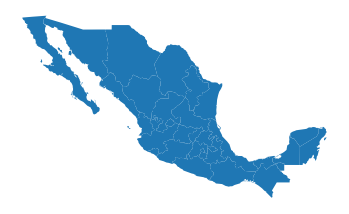

In [8]:
ax = gdf.plot() # simplemente grafica el dataframe 
ax.set_axis_off() # elimina los ejes

In [10]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


## Pesos de contigüidad


In [11]:
w_rook = Rook.from_dataframe(gdf)

In [13]:
w_rook.n

32

In [14]:
w_rook.pct_nonzero

12.6953125

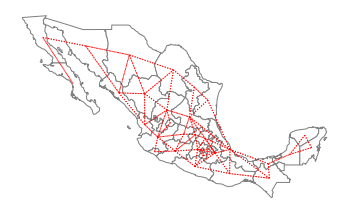

In [22]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [24]:
w_rook.neighbors[0]

[1, 22]

In [26]:
gdf['NAME'][[0,1,22]]

0     Baja California Norte
1       Baja California Sur
22                   Sonora
Name: NAME, dtype: object

O sea baja california Norte tiene como vecinos a Baja California Sur y Sonora

In [27]:
w_queen = Queen.from_dataframe(gdf)

In [28]:
w_queen.n == w_rook.n

True

In [31]:
(w_queen.pct_nonzero > w_rook.pct_nonzero) == (w_queen.n == w_rook.n)

True

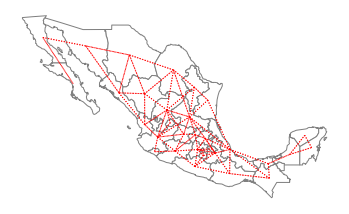

In [32]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_queen.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [35]:
w_queen.histogram

[(1, 1), (2, 6), (3, 6), (4, 6), (5, 5), (6, 2), (7, 3), (8, 2), (9, 1)]

In [36]:
w_rook.histogram

[(1, 1), (2, 6), (3, 7), (4, 7), (5, 3), (6, 4), (7, 3), (8, 1)]

In [38]:
c9 = [idx for idx,c in w_queen.cardinalities.items() if c==9]

In [39]:
gdf['NAME'][c9]

28    San Luis Potosi
Name: NAME, dtype: object

In [42]:
w_rook.neighbors[28],w_queen.neighbors[28]

([5, 6, 7, 27, 29, 30, 31], [3, 5, 6, 7, 24, 27, 29, 30, 31])

(-105.0, -95.0, 21.0, 26.0)

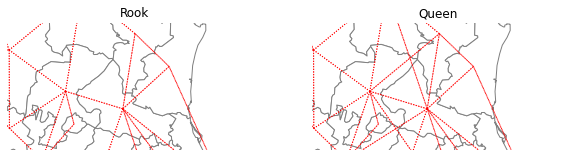

In [45]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(10, 6), subplot_kw=dict(aspect='equal'))
gdf.plot(edgecolor='grey', facecolor='w', ax=ax[0])
w_rook.plot(gdf, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Rook')
ax[0].axis(np.asarray([-105.0, -95.0, 21, 26]))

ax[0].axis('off')
gdf.plot(edgecolor='grey', facecolor='w', ax=ax[1])
w_queen.plot(gdf, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Queen')
ax[1].axis('off')
ax[1].axis(np.asarray([-105.0, -95.0, 21, 26]))

In [46]:
w_knn = KNN.from_dataframe(gdf, k = 4)

In [47]:
w_knn.histogram

[(4, 32)]

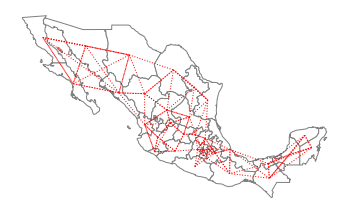

In [48]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_knn.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

# Armar los pesos desde shapefiles (sin geopandas)

In [49]:
pth = libpysal.examples.get_path("mexicojoin.shp")
from libpysal.weights import Queen, Rook, KNN

In [51]:
w_queen = Queen.from_shapefile(pth)
w_rook = Rook.from_shapefile(pth)
w_knn1 = KNN.from_shapefile(pth)

C:\Users\paban\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


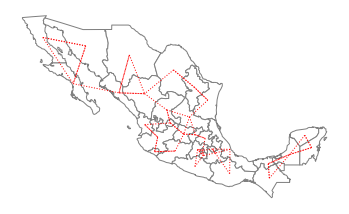

In [52]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_knn1.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [53]:
w_knn3 = KNN.from_shapefile(pth, k=3)

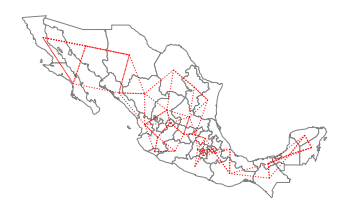

In [54]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_knn3.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

## Lattice Weights

In [56]:
from libpysal.weights import lat2W

In [58]:
w = lat2W(nrows = 4, ncols = 3)
w.

In [61]:
w.neighbors

{0: [3, 1],
 3: [0, 6, 4],
 1: [0, 4, 2],
 4: [1, 3, 7, 5],
 2: [1, 5],
 5: [2, 4, 8],
 6: [3, 9, 7],
 7: [4, 6, 10, 8],
 8: [5, 7, 11],
 9: [6, 10],
 10: [7, 9, 11],
 11: [8, 10]}